In [11]:
from michigrad.engine import Value
from michigrad.visualize import show_graph, show_graph_interactive
import numpy as np

In [2]:
a = Value(2,name='a')
b = Value(5,name='b')
c = Value(5,name='c')
f = (a*b)+c
f.name='f'

In [3]:
c = a+b

In [4]:
c.name='c'

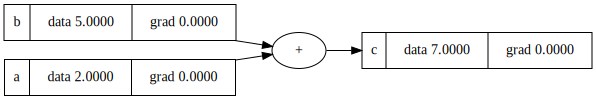

In [5]:
show_graph(c)

In [6]:
x = []
for i in range(2):
    x.append(Value(5, name=f'x{i}'))
W = []
for i in range(2):
    W.append(Value(np.random.randn(), name=f'W{i}'))
W


[Value(data=-0.39005965849516033, grad=0, name=W0),
 Value(data=-0.3416205659175523, grad=0, name=W1)]

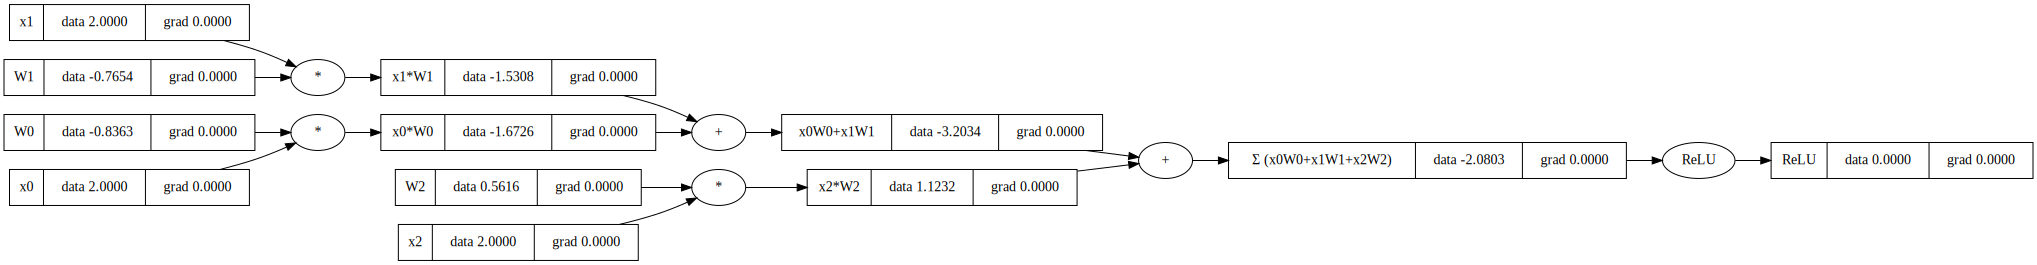

In [10]:
# ReLU(x0 * W0 + x1 * W1)
x0 = Value(2,name='x0')
x1 = Value(2,name='x1')
x2 = Value(2,name='x2')
W0 = Value(np.random.randn(), name=f'W0')
W1 = Value(np.random.randn(), name=f'W1')
W2 = Value(np.random.randn(), name=f'W2')
x0W0 = x0 * W0
x0W0.name = 'x0*W0'
x1W1 = x1 * W1
x1W1.name = 'x1*W1'
x2W2 = x2 * W2
x2W2.name = 'x2*W2'
suma1 = x0W0 + x1W1
suma1.name = 'x0W0+x1W1'
suma2 = suma1 + x2W2
suma2.name = 'Σ (x0W0+x1W1+x2W2)'
#suma2.name = "Σ"
relu = suma2.relu()
relu.name = "ReLU"
show_graph(relu)

In [12]:
show_graph_interactive(relu)

graph.html


In [15]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


In [17]:
def draw_dot(root):
   
    nodes, edges = trace(root)
    G = nx.DiGraph()
    for n in nodes:
        G.add_node(n.name,label=f'{n.name}: {n.data} | {n.grad}')
        if n._op:
            G.add_node(n.name+n._op, label=n._op)
            G.add_edge(n.name+n._op, n.name)
    
    for n1, n2 in edges:
        G.add_edge(n1.name, n2.name+n2._op)
    print(G.nodes, G.edges)
    # Convertir el grafo de NetworkX a Pyvis
    net = Network(notebook=True, directed=True,cdn_resources='in_line')
    net.from_nx(G)

    # Guardar y mostrar el grafo
    net.show("grafo_dirigido.html")
    return G

In [18]:
G = draw_dot(f)

['a', 'c', 'f', 'f+', '', '*', 'b'] [('a', '*'), ('c', 'f+'), ('f+', 'f'), ('', 'f+'), ('*', ''), ('b', '*')]
grafo_dirigido.html


In [58]:
nodes, edges = trace(c)
# edges = [(str(a),str(b)) for a,b in edges]
# for n in nodes:
#     #dot.node(name=str(id(n)), label = "{%s| data %.4f | grad %.4f }" % (n.name, n.data, n.grad), shape='record')
#     if n._op:
#         #ot.node(name=str(id(n)) + n._op, label=n._op)
#         edges.append((str(n), n._op))

In [87]:
c

Value(data=7, grad=0, name=c)

In [39]:
edges

[('Value(data=2, grad=0, name=a)', 'Value(data=7, grad=0, name=c)'),
 ('Value(data=5, grad=0, name=b)', 'Value(data=7, grad=0, name=c)'),
 ('Value(data=7, grad=0, name=c)+', 'Value(data=7, grad=0, name=c)')]

In [51]:
id(c),id(a)

(135023711694400, 135023711683360)

In [113]:
G.nodes, G.edges

(NodeView((1,)), OutEdgeView([]))

In [109]:
G = nx.DiGraph()

In [112]:
G.add_node(1, label='x1')

In [ ]:
G.